In [1]:
%matplotlib inline
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import sklearn as sl
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
my_data = pd.read_csv('TVdata.txt')

In [4]:
my_data.info

<bound method DataFrame.info of       video_id  cvt_per_day  weighted_categorical_position  \
0       385504   307127.606                              1   
1       300175   270338.426                              1   
2       361899   256165.867                              1   
3       308314   196622.721                              3   
4       307201   159841.652                              1   
5       389496   135076.610                              1   
6       385507   134155.740                              1   
7       380517   116906.008                              1   
8       369857   116871.122                              2   
9       393463   111565.597                              2   
10      307719   103283.899                              3   
11      302360    98665.990                              1   
12      300842    94997.158                              3   
13      326237    93536.514                              3   
14      300243    91924.547           

In [5]:
my_data.head(3)

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647


In [6]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_poition      4226 non-null int64
import_id                        4226 non-null object
release_year                     4226 non-null int64
genres                           4226 non-null object
imdb_votes                       4226 non-null int64
budget                           4226 non-null int64
boxoffice                        4226 non-null int64
imdb_rating                      4226 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 4226 non-null int64
awards                           4226 non-null object
mpaa                             4226 non-null object
star_category                    4226 non-null float64
dtypes: float64(4), int64(8), obj

In [7]:
my_data.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,280371.163,4218.630,7.783,28.104,2001.057,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,112640.128,13036.080,6.134,11.864,17.497,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,7909.000,2.188,1.000,1.000,1916.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
25%,285104.250,351.169,4.000,20.000,1998.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,313891.500,1193.500,6.000,28.000,2008.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,349345.750,3356.789,9.000,36.000,2012.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
max,394880.000,307127.606,41.000,70.000,2017.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


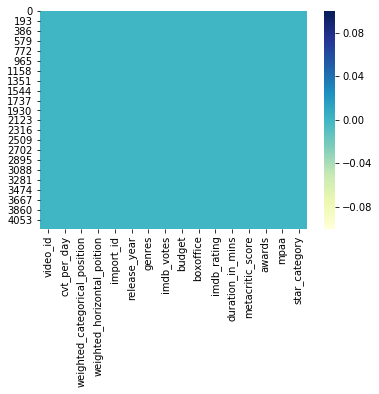

In [8]:
sns.heatmap(my_data.isnull(),cmap = 'YlGnBu')

In [10]:
tv_data_df = my_data
tv_data_df.shape

(4226, 16)

In [11]:
print ("Num of rows: " + str(tv_data_df.shape[0])) # row count
print ("Num of columns: " + str(tv_data_df.shape[1])) # col count

Num of rows: 4226
Num of columns: 16


In [13]:
print(len(tv_data_df.set_index('video_id').index.get_duplicates()))

0


/Users/christie/jupyterNotebook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  """Entry point for launching an IPython kernel.


In [12]:
# check duplicated entry
if len(tv_data_df.set_index('video_id').index.get_duplicates()) == 0:
    print('There is no duplicated entry (video_id based).')

There is no duplicated entry (video_id based).


/Users/christie/jupyterNotebook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  


In [15]:
tv_data_df.drop(['video_id', 'release_year'],axis=1).describe(percentiles = [.1, .25, .5, .75, .95])

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,4218.630,7.783,28.104,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,13036.080,6.134,11.864,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,2.188,1.000,1.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
10%,141.985,3.000,13.000,8.000,0.000,0.000,2.300,62.391,0.000,0.000
25%,351.169,4.000,20.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,1193.500,6.000,28.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,3356.789,9.000,36.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
95%,14692.834,22.000,48.000,26199.500,12000000.000,8551228.000,7.800,119.131,65.000,2.597
max,307127.606,41.000,70.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


In [16]:
print((tv_data_df == 0).sum())

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
import_id                           0
release_year                        0
genres                              0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
awards                              0
mpaa                                0
star_category                    1846
dtype: int64


In [17]:
print(tv_data_df.dtypes)

video_id                           int64
cvt_per_day                      float64
weighted_categorical_position      int64
weighted_horizontal_poition        int64
import_id                         object
release_year                       int64
genres                            object
imdb_votes                         int64
budget                             int64
boxoffice                          int64
imdb_rating                      float64
duration_in_mins                 float64
metacritic_score                   int64
awards                            object
mpaa                              object
star_category                    float64
dtype: object


In [18]:
sns.set_style('darkgrid')

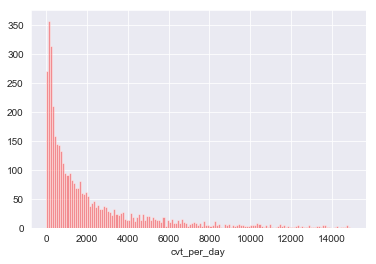

In [26]:
sns.distplot(tv_data_df['cvt_per_day'],bins = range(0,15000, 100), color = 'red',kde = False)

/Users/christie/jupyterNotebook/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


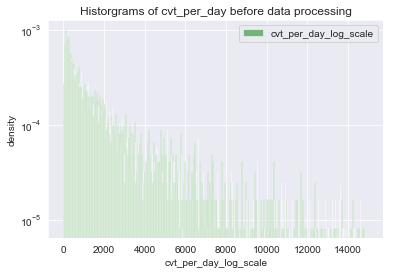

In [27]:
# log scale of y due to large variation
plt.hist(tv_data_df['cvt_per_day'].values, log = True, bins = range(0,15000, 30), alpha = 0.5, color='g', label = 'cvt_per_day_log_scale', normed = True)
plt.legend(loc ='upper right')
plt.title('Historgrams of cvt_per_day before data processing')
plt.xlabel('cvt_per_day_log_scale')
plt.ylabel('density')
plt.show()

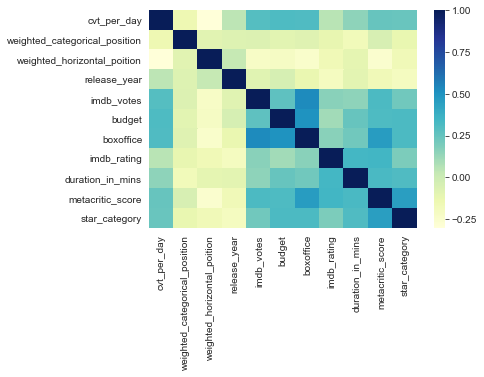

In [29]:
sns.heatmap(tv_data_df.drop(['video_id'],axis=1).corr(),cmap="YlGnBu")

In [30]:
tv_data_df.drop(['video_id'],axis=1).corr()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000,-0.148,-0.302,0.046,0.298,0.316,0.312,0.059,0.152,0.249,0.247
weighted_categorical_position,-0.148,1.000,-0.084,-0.069,-0.064,-0.090,-0.074,-0.116,-0.174,-0.044,-0.123
weighted_horizontal_poition,-0.302,-0.084,1.000,0.027,-0.221,-0.211,-0.245,-0.162,-0.102,-0.255,-0.168
release_year,0.046,-0.069,0.027,1.000,-0.083,-0.040,-0.128,-0.199,-0.097,-0.167,-0.198
imdb_votes,0.298,-0.064,-0.221,-0.083,1.000,0.273,0.531,0.163,0.156,0.322,0.225
budget,0.316,-0.090,-0.211,-0.040,0.273,1.000,0.505,0.106,0.251,0.315,0.322
boxoffice,0.312,-0.074,-0.245,-0.128,0.531,0.505,1.000,0.164,0.226,0.465,0.322
imdb_rating,0.059,-0.116,-0.162,-0.199,0.163,0.106,0.164,1.000,0.344,0.347,0.192
duration_in_mins,0.152,-0.174,-0.102,-0.097,0.156,0.251,0.226,0.344,1.000,0.327,0.309
metacritic_score,0.249,-0.044,-0.255,-0.167,0.322,0.315,0.465,0.347,0.327,1.000,0.452


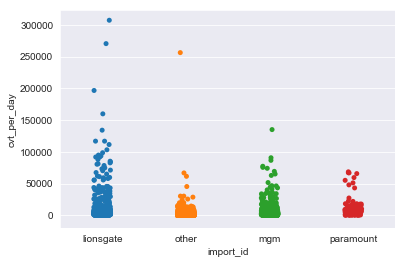

In [31]:
sns.stripplot(x='import_id', y='cvt_per_day', data=tv_data_df, jitter=True)

In [32]:
print(tv_data_df['import_id'].value_counts())

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


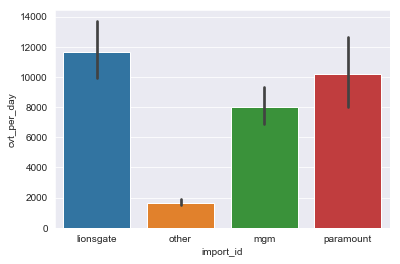

In [33]:
sns.barplot(x='import_id', y='cvt_per_day', data=tv_data_df)

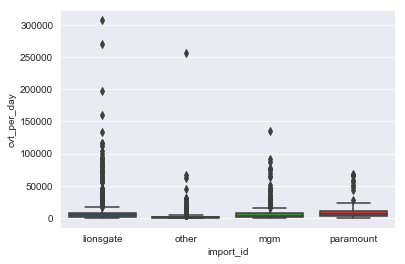

In [34]:
sns.boxplot(x='import_id', y='cvt_per_day', data=tv_data_df)

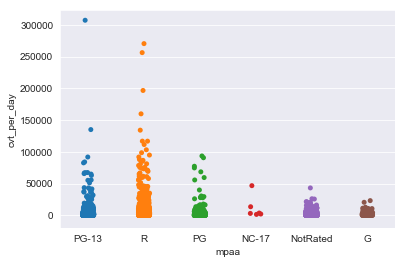

In [35]:
sns.stripplot(x='mpaa', y='cvt_per_day', data=tv_data_df, jitter=True)

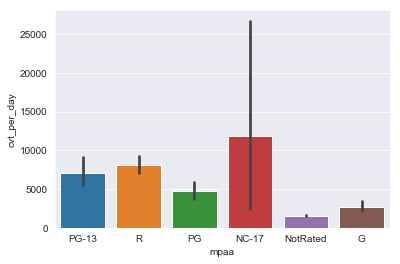

In [36]:
sns.barplot(x='mpaa', y='cvt_per_day', data=tv_data_df)

In [37]:
print(tv_data_df['mpaa'].value_counts())

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64
